# Esercitazione 1

## 1 Test del generatore di numeri pseudo-casuali

### 1.1 Obiettivo

L'esercizio ha l'obiettivo di valutare la libreria per la generazione di numeri casuali. Questa contiene la funzione `Rannyu()` che dovrebbe restituire un numero pseudocasuale ($r$) generato con distribuzione di probabilità uniforme tra 0 e 1. L'esercizio si divide in 3 richieste:
1. Valutare $\langle r \rangle$ con relativa incertezza. Il risultato aspettato è $\int_0^1 \frac{1}{2}\text{d}r = 1/2 $
2. Valutare lo scarto quadratico delle estrazioni effettuate con relativa incertezza. Il risultato aspettato è $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$
3. Eseguire un test di $\chi^2$ per verificare l'ipotesi che i valori $r$ siano estratti con distribuzione uniforme

### 1.2 Implementazione

La stima delle quantità richieste nei punti (1) e (2) viene realizzata utilizzando la tecnica della media a blocchi:
le M estrazioni Monte Carlo vengono divise in N blocchi da L=M/N estrazioni ciascuno. Per ogni blocco vengono calcolati e salvati i valori medi delle quantità che si desidera ottenere. Dopo n blocchi la migliore stima di tali quantità sarà quindi data dalla media delle n medie di blocco, mentre la deviazione standard di tali valori medi fornirà una stima dell'incertezza statistica.

Il test di $\chi^2$, realizzato nello stesso programma, viene effettuato nel seguente modo:
* si divide l'intervallo (0,1) in K sottointervalli
* si estraggono R numeri casuali in (0,1)
* ad ogni estrazione si incrementa il contatore delle frequenze relativo al sottointervallo in cui cade il numero estratto

Il $\chi^2$ è quindi dato da 
$$
\chi^2 = \sum_{i=1}^K\frac{\left( o_i - e_i \right)^2}{e_i}
$$
Dove l'indice i si riferisce ai sottointervalli considerati, $o_i$ rappresenta la frequenza osservata nell'intervallo i-esimo e $e_i$ rappresenta la frequenza aspettata. Nell'ipotesi di distribuzione uniforme $e_i=R/K$. 

Viene ripetuto il test per N_TEST volte.

### 1.3 Utilizzo

Il codice che implementa la risoluzione dell'esercizio è completamente contenuto in `main.cpp`. In questo file sono presenti le definizioni delle costanti N, M, K, R, N_STEP i cui significati sono già stati anticipati. È possibile variare questi parametri modificandone la definizione e ricompilando il programma.

Una volta compilato, per essere eseguito il programma richiede 3 argomenti corrispondenti ai file in cui si desidera salvare i risultati di ciascuno, rispettivamente, dei 3 punti dell'esercizio.

Per quanto riguarda i primi due punti, i file di salvataggio sono costituiti da due colonne. La riga n-esima contiene, in questo ordine, stima (come media delle medie di blocco) e incertezza statistica al blocco n della grandezza in esame.

Il file relativo al test di $\chi^2$ contiene invece, per ogni riga, il valore del $\chi^2$ ottenuto da un test differente.

### 1.4 Risultati

1) Stima di $\langle r \rangle$

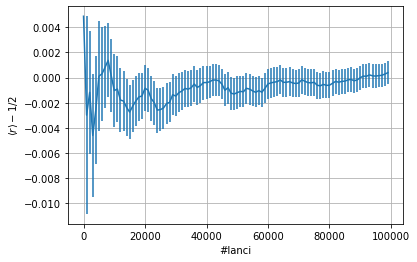

stima finale di r: 0.5004
incertezza: 0.0009

distante 0.4σ dal valore aspettato


In [1]:
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

r, err = np.loadtxt('../01/01.1/mean.output', usecols=(0,1), delimiter=" ", unpack=True)
x = np.arange(0, len(r))
x*= 1000
plt.errorbar(x, r-0.5, err)
plt.xlabel("#lanci")
plt.ylabel('$\\langle r \\rangle  - 1/2 $')
plt.grid()
plt.show()

print("stima finale di r: {:.4}".format(r[-1]))
print("incertezza: {:.1}".format(err[-1]))
print('\ndistante {:.1}σ dal valore aspettato'.format((r[-1]-0.5)/err[-1]))

Il grafico mostra il progressivo miglioramento della stima di $\langle r \rangle$ con l'aumentare del numero di estrazioni (lanci) effettuate. Il risultato ottenuto è compatibile, entro l'incertezza statistica stimata, con il valore aspettato.

2) Stima di $\sigma^2 = \langle (r-0.5)^2 \rangle$ relativa alla stessa variabile aleatoria $r$ del punto precedente. Il valore che ci si aspetterebbe da una distribuzione uniforme è $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \simeq 0.0833$

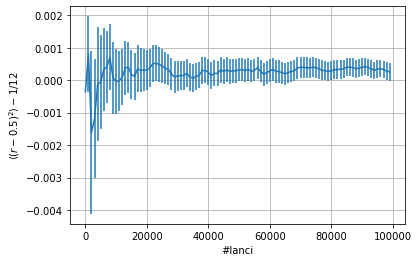

stima finale : 0.0836
incertezza: 0.0003

distante 0.9σ dal valore aspettato


In [2]:
var, err = np.loadtxt('../01/01.1/var.output', usecols=(0,1), delimiter=" ", unpack=True)
plt.errorbar(x, var-1/12, err)
plt.grid()
plt.ylabel('$\\langle(r-0.5)^2 \\rangle - 1/12$')
plt.xlabel('#lanci')
plt.show()

print("stima finale : {:.3}".format(var[-1]))
print("incertezza: {:.1}".format(err[-1]))

print('\ndistante {:.1}σ dal valore aspettato'.format((var[-1]-1/12)/err[-1]))

Come per il punto precedente il grafico mostra il progressivo miglioramento della stima di $\sigma^2$ con l'aumentare del numero di estrazioni (lanci) effettuate. Il risultato ottenuto è compatibile, entro l'incertezza statistica stimata, con il valore aspettato.

3) Vengono inizialmente effettuati 100 test $\chi^2$ dividendo l'intervallo (0,1) in 100 subintervalli. Si può dimostrare che nel limite in cui il numero di estrazioni $R \rightarrow +\infty$ e assumendo sia verificata l'ipotesi di distribuzione uniforme con cui sono stati calcolati gli $e_i$, la variabile $\chi^2$ è caratterizzata da una specifica distribuzione di probabilità. Questa PDF, chiamata distribuzione di $\chi^2$, è caratterizzata da un solo parametro $k$ corrispondente ai gradi di libertà. In questo esercizio $k=100-1=99$ ovvero il numero di intervalli meno 1 per il fatto che questo numero è vincolato. Il valore aspettato della $\chi^2$ PDF è $k$.

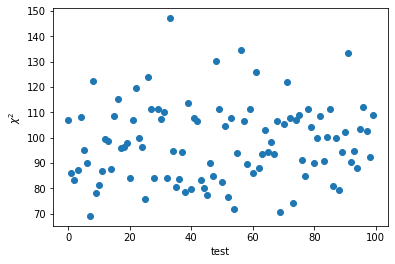

Valore medio dei 100 test: 97.9
Varianza: 227.5
Deviazione standard: 15.1


In [3]:
chi = np.loadtxt('../01/01.1/chi2.output', delimiter="\n")

plt.plot(chi, 'o')
plt.ylabel('$\chi^2$')
plt.xlabel('test')
plt.show()

mean = sum(chi)/len(chi)
var = sum(chi**2)/len(chi)-mean**2;
print("Valore medio dei " + str(len(chi)) + " test: {:.3}".format(mean))
print("Varianza: {:.4}".format(var))
print("Deviazione standard: {:.3}".format(var**0.5))

In questo grafico ho rappresentato i risultati ottenuti dai 100 test di $\chi^2$ effettuati. Il valore medio è compatibile, entro la deviazione standard, con il valore aspettato.

Ho inoltre rieseguito la simulazione eseguendo $10^5$ test di $\chi^2$ e mantenendo invariati gli altri parametri. I risultati ottenuti presentano la seguente distribuzione:

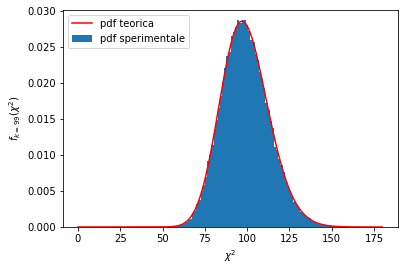

In [4]:
import scipy.stats as stats

data = np.loadtxt('../01/01.1/chi2_1e5.output')

plt.hist(data, 100, density=True, label='pdf sperimentale')

x = np.arange(0, 180, .05)
plt.plot(x, stats.chi2.pdf(x, df=99), color='r', lw=1.5, label='pdf teorica')

plt.xlabel('$\chi^2$')
plt.ylabel('$f_{k=99}(\chi^2)$')
plt.legend(loc='upper left')
plt.show()

In quest'ultimo grafico ho realizzato un istogramma normalizzato dei $10^5$ valori di $\chi^2$ ottenuti, in modo tale da visualizzarne la distribuzione. In rosso ho inoltre sovraimposto la distribuzione di probabilità teorica di $\chi^2$ nel caso di 99 gradi di libertà. Come si può osservare, il risultato ottenuto è in accordo con quello teorico. Si può quindi concludere che il generatore di numeri pseudocasuali realizza efficacemente una distribuzione di probabilità uniforme.

## 2  Verifica del teorema del limite centrale

### 2.1 Obiettivo

In questo esercizio vengono eseguite due verifiche del teorema del limite centrale e viene fornito un esempio in cui invece non sono verificate le ipotesi di questo teorema.

### 2.2 Implementazione

Per la realizzazione di questo esercizio ho innanzitutto aggiunto alla classe per la generazione di numeri casuali 3 nuovi metodi:
- `double Exp(double lambda)` : genera un numero pseudo-casuale estraendolo con distribuzione di probabilita esponenziale $p(x) = \lambda e^{-\lambda x}$
- `double Gauss(double mean, double sigma)` : genera un numero pseudo-casuale estraendolo con distribuzione di probabilità gaussiana $p(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2)$
- `double Cauchy(double mean, double gamma)` : genera un numero pseudo-casuale estraendolo con distribuzione di probabilità di Cauchy $p(x) = \frac{1}{\pi}\frac{\gamma}{(x-\mu)^2+\gamma^2}$

`Exp(...)` e `Cauchy(...)` sono state implementate utilizzando il metodo dell'inversione della funzione cumulativa. Per `Gauss(..)` ho invece utilizzato il metodo di Box-Muller.

Il file `main.cpp` implementa la risoluzione dell'esercizio nel seguente modo:
per ogni distribuzione di probabilità considerata vengono generati 4 insiemi ciascuno contenente K valori medi. Ciascun valore medio consiste nella media aritmetica di un certo numero N di valori estratti con la distribuzione di probabilità considerata. Ciascun insieme di medie è caratterizzato da un numero N differente. 

Supponendo che tutti i numeri utilizzati per generare le medie siano estratti da una distribuzione di probabilità caratterizzata da valor aspettato $\mu$ e varianza $\sigma^2$, il teorema del limite centrale prevede che nel limite di $N\rightarrow\infty$ la distribuzione delle medie tenda ad una gaussiana con valor aspettato pari a $\mu$ e varianza $\sigma^2/N$

### 2.3 Utilizzo

I vari parametri di questa implementazione sono stati impostati tramite la definizione di costanti. È possibile modificarli aggiornando il codice e ricompilando il programma.

L'esecuzione dell'eseguibile generato richiede tre argomenti corrispondenti ai nomi dei tre file nei quali verrà eseguito l'output.

In ciascuno di questi file i dati generati vengono salvati nel seguente formato: ciascuna colonna si riferisce ad un diverso insieme e contiene le K medie calcolate.

### 2.4 Risultati

Nel primo caso viene eseguita $10^4$ volte la media di una variabile aleatoria x distribuita uniformemente in $(0,1)$ utilizzando N estrazioni per ogni stima.  I risultati ottenuti al variare di N si possono osservare nel grafico seguente. La distribuzione di probabilità uniforme tra 0 e 1 è caratterizzata da $\mu=0.5$ e $\sigma^2=1/12$.

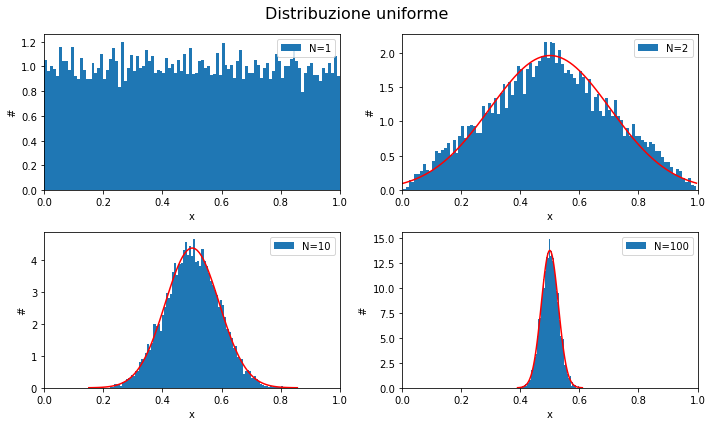

Interpolazioni con distribuzione normale
N=2 	-> interpolata: μ = 0.5, σ = 0.203; 	 aspettata: μ = 0.5, σ = 0.204
N=10 	-> interpolata: μ = 0.5, σ = 0.0911; 	 aspettata: μ = 0.5, σ = 0.0913
N=100 	-> interpolata: μ = 0.5, σ = 0.0289; 	 aspettata: μ = 0.5, σ = 0.0289


In [5]:
from scipy.stats import norm

ran = range(4)
labels=['N=1', 'N=2', 'N=10', 'N=100']
N = [1,2,10,100]
fig, axs = plt.subplots(2,2, figsize=(10,6))
axs = axs.flatten()
gauss_fits = []
for i in ran:
    data = np.loadtxt('../01/01.2/std.dat', usecols=(i), delimiter=" ", unpack=True)
    n, bins, p = axs[i].hist(data, 100, label=labels[i], density=True)
    
    #fitting with a normal distribution
    gauss_fits.append(norm.fit(data))
    
    #plotting fitted gaussian
    if i != 0:
        y = norm.pdf(bins, gauss_fits[i][0], gauss_fits[i][1])
        axs[i].plot(bins, y, color='red', lw=1.5)
    
    axs[i].set_xlim([0,1])
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('#')
fig.suptitle('Distribuzione uniforme', fontsize=16)
plt.tight_layout()
plt.show()

print('Interpolazioni con distribuzione normale')
for i in range(1,4):
    print("{} \t-> interpolata: μ = {:.2}, σ = {:.3}; \t aspettata: μ = {:.2}, σ = {:.3}"
          .format(labels[i], gauss_fits[i][0], gauss_fits[i][1], 0.5, np.sqrt(1/12)/np.sqrt(N[i])))

In questi grafici si può osservare il comportamento previsto dal teorema del limite centrale: le medie tendono all'aumentare di N ad assumere una distribuzione normale caratterizzata da varianza pari a $\sigma^2/N$.
_Nota: per consentire l'interpolazione gli istogrammi sono stati normalizzati_

In questo secondo caso il procedimento utilizzato è esattamente lo stesso del caso precedente con l'unica differenza che la variabile aleatoria x è estratta con distribuzione di probabilità esponenziale con $\lambda=1$. Per il valore di $\lambda$ scelto la distribuzione è caratterizzata da $\mu=1$ e $\sigma^2=1$. Anche in questo caso si può osservare come la distribuzione delle medie tenda progressivamente ad una gaussiana centrata sul valore aspettato come previsto dal teorema del limite centrale.

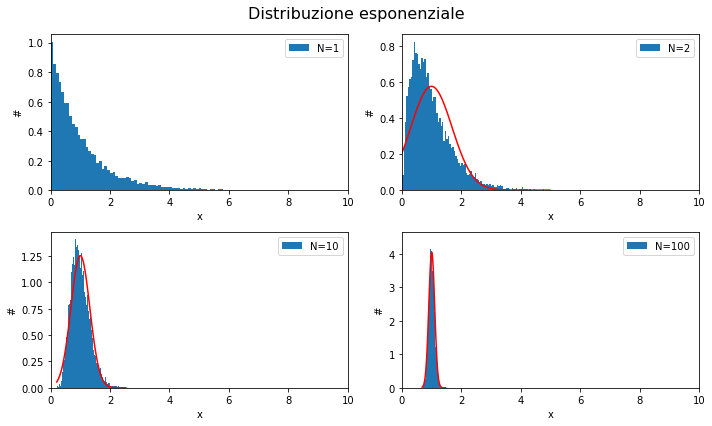

Interpolazioni con distribuzione normale
N=2 	-> interpolata: μ = 0.99, σ = 0.693; 	 aspettata: μ = 1.0, σ = 0.707
N=10 	-> interpolata: μ = 1.0, σ = 0.318; 	 aspettata: μ = 1.0, σ = 0.316
N=100 	-> interpolata: μ = 1.0, σ = 0.0986; 	 aspettata: μ = 1.0, σ = 0.1


In [6]:
ran = range(4)
labels=['N=1', 'N=2', 'N=10', 'N=100']
N = [1,2,10,100]
fig, axs = plt.subplots(2,2, figsize=(10,6))
axs = axs.flatten()
gauss_fits = []
for i in ran:
    data = np.loadtxt('../01/01.2/exp.dat', usecols=(i), delimiter=" ", unpack=True)
    n, bins, p = axs[i].hist(data, 100, label=labels[i], density=True)
    
    #fitting with a normal distribution
    gauss_fits.append(norm.fit(data))
    
    #plotting fitted gaussian
    if i != 0:
        y = norm.pdf(bins, gauss_fits[i][0], gauss_fits[i][1])
        axs[i].plot(bins, y, color='red', lw=1.5)
    
    axs[i].set_xlim([0,10])
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('#')
fig.suptitle('Distribuzione esponenziale', fontsize=16)
plt.tight_layout()
plt.show()

print('Interpolazioni con distribuzione normale')
for i in range(1,4):
    print("{} \t-> interpolata: μ = {:.2}, σ = {:.3}; \t aspettata: μ = {:.2}, σ = {:.3}"
          .format(labels[i], gauss_fits[i][0], gauss_fits[i][1], 1.0, 1/np.sqrt(N[i])))

Nell'ultimo caso invece la variabile x è estratta con una distribuzione di probabilità lorentziana con $\mu=0$ e $\gamma=1$. Questa distribuzione di probabilità non soddisfa l'ipotesi del teorema del limite centrale che richiede che la distribuzione abbia varianza finita. I momenti di questa distribuzione sono infatti divergenti.

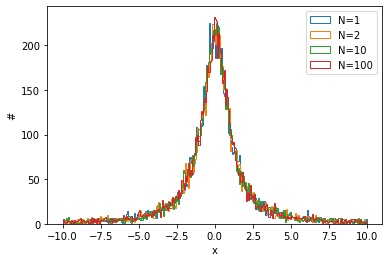

In [7]:
ran = range(4)
for i in ran:
    data = np.loadtxt('../01/01.2/lor.dat', usecols=(i), delimiter=" ", unpack=True)
    plt.hist(data, 300, histtype='step', range=(-10,10), label=labels[i])
plt.legend()
plt.xlabel('x')
plt.ylabel('#')
plt.show()

In questo grafico si può osservare come la distribuzione delle medie non converga ad una distribuzione gaussiana. Assume invece la stessa distribuzione lorentziana con cui sono estratti i singoli valori casuali e non si modifica all'aumentare del numero N di valori utilizzati per il calcolo delle medie.

## 3 Stima di $\pi$ con il metodo di Buffon

### 3.1 Obiettivo

L'obiettivo di questo esercizio è l'implementazione di una simulazione dell'esperimento dell'ago di Buffon per la stima del valore di $\pi$.

### 3.2 Esperimento di Buffon

L'esperimento dell'ago di Buffon è un metodo Monte Carlo per il calcolo di $\pi$. 

Consiste in:
- considerare una griglia di linee parallele a distanza _d_
- lanciare ripetutamente un ago di lunghezza _l_<_d_ 

la probabilità che l'ago intersechi una linea si può dimostrare essere pari a $\frac{2l}{\pi d}$. Eseguendo ripetutamente il lancio e contando il numero di volte che l'ago interseca una linea parallela, è possibile stimare la probabilità dividendo per il numero di lanci e quindi valutare $\pi$ invertendo l'espressione precedente.

### 3.3 Implementazione

Il codice realizzato implementa il metodo della media a blocchi per la stima dell'incertezza statistica sul valore di $\pi$ calcolato dalla simulazione.

Parametri noti al programma sono la lunghezza dell'ago, la distanza tra due linee vicine e gli estremi dell'intervallo di simulazione.
Il singolo lancio viene simulato nel seguente modo:
- viene estratto un numero pseudocasuale con distribuzione uniforme nell'intervallo di simulazione: questo valore rappresenterà il centro dell'ago.
- viene estratto un numero pseudocasuale con distribuzione uniforme tra 0 e $\pi$: questo valore rappresenterà l'angolo formato dall'ago con l'asse orizzontale.

Per l'estrazione dell'angolo ho implementato una funzione separata che evita l'utilizzo del valore di $\pi$, in quanto potenzialmente sconosciuto a priori. Per far questo viene estratto casualmente un punto nel piano x-y all'interno della circonferenza goniometrica. La congiungente di questo punto con l'origine determina l'angolo estratto. La funzione ritorna poi il valore $x/\sqrt{x^2+y^2}$, ovvero il coseno dell'angolo.

### 3.4 Utilizzo

Diversi parametri della simulazione sono impostati tramite la definizione di una costante, possono quindi essere modificati aggiornando i valori nel codice e ricompilando il file. Tra questi parametri vi sono sia quelli riguardanti il metodo della media a blocchi (numero di lanci, numero di blocchi) sia quelli riguardanti le varie dimensioni in gioco (lunghezza ago, distanza tra le linee, dominio della simulazione).

Il programma deve essere eseguito fornendogli come unico argomento il nome del file nel quale verrà salvato l'output. In questo file ciascuna riga sarà relativa ad un blocco differente e conterrà rispettivamente la migliore stima di $\pi$ a quel blocco e la relativa incertezza statistica.

### 3.5 Risultati

La simulazione è stata eseguita effettuando $10^6$ lanci divisi in 100 blocchi. Ho utilizzato il valore 0.09 come dimensione dell'ago e 0.1 come spaziatura tra le linee parallele.

Il risultato ottenuto è il seguente

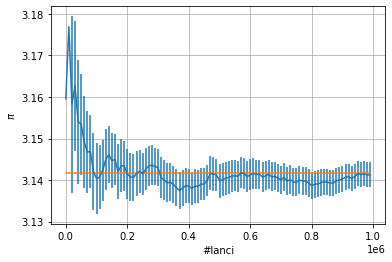

stima finale di π: 3.141
incertezza: 0.003

distante 0.1σ dal valore aspettato


In [8]:
from IPython.display import display, Latex
p, err = np.loadtxt('../01/01.3/out.dat', usecols=(0,1), delimiter=" ", unpack=True)
x = np.arange(len(p))
plt.errorbar(x*10000, p, err)
plt.plot(x*10000, np.full(len(x), np.pi))
plt.xlabel('#lanci')
plt.ylabel('$\pi$')
plt.grid()
plt.show()

print("stima finale di π: {:.4}".format(p[-1]))
print("incertezza: {:.1}".format(err[-1]))
print('\ndistante {:.1}σ dal valore aspettato'.format(abs(p[-1]-np.pi)/err[-1]))

In questo grafico si possono osservare le stime ottenute al crescere del numero di blocchi (e quindi lanci) considerati. Si nota il progressivo miglioramento della stima di $\pi$ e la riduzione dell'incertezza statistica associata. Il valore finale ottenuto risulta compatibile entro la sua incertezza con il valore conosciuto.